In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('iris-data.csv')
df = df[['Sepal Length', 'Sepal Width']]
df.head()

,Sepal Length,Sepal Width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [3]:
cov = np.cov(df.values.T)
cov

array([[ 0.68569351, -0.03926846],
       [-0.03926846,  0.18800403]])

In [4]:
model = PCA(n_components=1)
sklearn_pca = model.fit_transform(df.values)

In [5]:
eigenvectors, eigenvalues, _ = np.linalg.svd(cov, full_matrices=False)
P = eigenvectors[0]
manual_pca = P.dot(df.values.T)

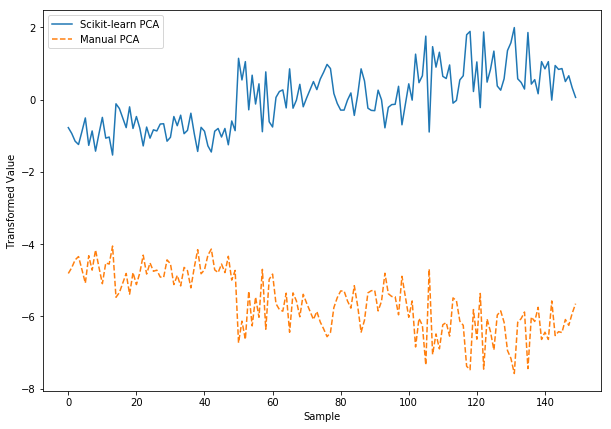

In [6]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [7]:
model.components_

array([[ 0.99693955, -0.07817635]])

In [8]:
P

array([-0.99693955,  0.07817635])

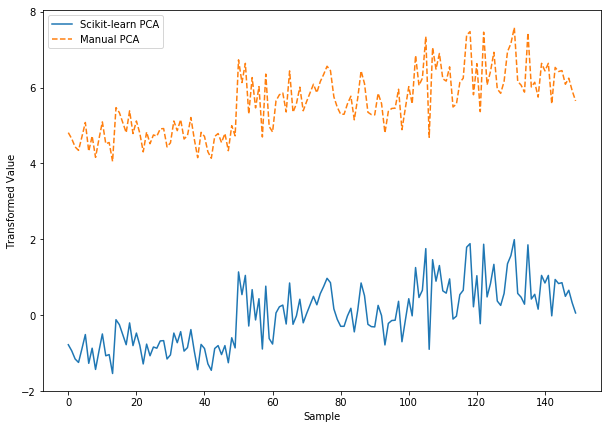

In [9]:
manual_pca *= -1
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();

In [10]:
mean_vals = np.mean(df.values, axis=0)
offset_vals = df.values - mean_vals
manual_pca = P.dot(offset_vals.T)

In [11]:
manual_pca *= -1

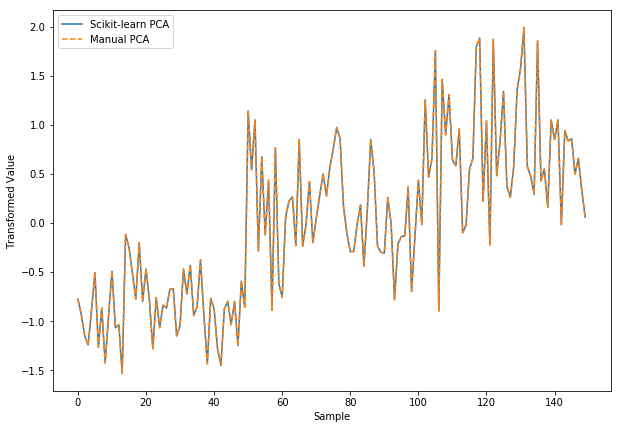

In [12]:
plt.figure(figsize=(10, 7));
plt.plot(sklearn_pca, label='Scikit-learn PCA');
plt.plot(manual_pca, label='Manual PCA', linestyle='--');
plt.xlabel('Sample');
plt.ylabel('Transformed Value');
plt.legend();